# Approach

 - We have created a dummy data set of 1 million records.
 - We have added some sort of correlation between the columns overallRating, TimelyDeliveries and other user provided info
 - However most of the columns are generated randomly so we only get a uniform distribution in them
 - This is just a dummy model created to highlight our approach towards the problem statement... We can surely improve the model by using domain data, more sophisticated learning algorithms like XGBoost,CatBoost, etc and by performing hyperparameter tuning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder

import os

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
dirpath = os.getcwd()
print(dirpath)

C:\Users\Anish.Alapattu\PycharmProjects\SupplierEvaluation


In [4]:
appended_data = pd.read_csv('UnbaisedTestDataset1.csv')

In [5]:
#for filename in os.listdir(dirpath):
#    if filename == 'venv' or filename.split('.')[1] != 'csv':
#        continue
#    data = pd.read_csv(filename)
#    appended_data = pd.concat([appended_data,data], ignore_index=True)

In [6]:
appended_data.head()

,PURCHASE_OPRDER,DateOfPurchase,ProductId,BuyerId,SupplierId,ProductQuantity,PricingPerUnit,NumberOfReturns,TimelyDeliveries,ProductQuality,ValueForMoney,OverallRating
0,1,2019-11-30T16:00:00.000Z,166,17,85,3285,1457,21,4,4,1,3
1,2,2019-10-26T00:00:00.000Z,172,87,51,3091,8595,17,1,4,3,2
2,3,2019-11-05T22:00:00.000Z,112,55,92,9991,3938,73,4,4,3,3
3,4,2020-07-20T04:00:00.000Z,25,29,14,2650,5029,19,4,1,2,2
4,5,2020-08-12T20:00:00.000Z,67,13,7,5249,9897,10,4,1,1,1


In [7]:
appended_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   PURCHASE_OPRDER   999999 non-null  int64 
 1   DateOfPurchase    999999 non-null  object
 2   ProductId         999999 non-null  int64 
 3   BuyerId           999999 non-null  int64 
 4   SupplierId        999999 non-null  int64 
 5   ProductQuantity   999999 non-null  int64 
 6   PricingPerUnit    999999 non-null  int64 
 7   NumberOfReturns   999999 non-null  int64 
 8   TimelyDeliveries  999999 non-null  int64 
 9   ProductQuality    999999 non-null  int64 
 10  ValueForMoney     999999 non-null  int64 
 11  OverallRating     999999 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 91.6+ MB


In [8]:
appended_data.describe()

,PURCHASE_OPRDER,ProductId,BuyerId,SupplierId,ProductQuantity,PricingPerUnit,NumberOfReturns,TimelyDeliveries,ProductQuality,ValueForMoney,OverallRating
count,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.00000,999999.000000
mean,500000.000000,100.463805,50.459299,50.482193,5048.991045,5051.635398,24.708646,3.000220,3.001332,3.00206,2.504648
std,288674.990257,57.694656,28.850753,28.859427,2860.473247,2858.429650,17.460858,1.414122,1.414530,1.41385,0.863926
min,1.000000,1.000000,1.000000,1.000000,100.000000,100.000000,0.000000,1.000000,1.000000,1.00000,1.000000
25%,250000.500000,51.000000,25.000000,26.000000,2569.000000,2576.000000,11.000000,2.000000,2.000000,2.00000,2.000000
50%,500000.000000,100.000000,50.000000,50.000000,5045.000000,5053.000000,21.000000,3.000000,3.000000,3.00000,3.000000
75%,749999.500000,150.000000,75.000000,75.000000,7528.000000,7527.000000,36.000000,4.000000,4.000000,4.00000,3.000000
max,999999.000000,200.000000,100.000000,100.000000,10000.000000,10000.000000,79.000000,5.000000,5.000000,5.00000,5.000000


Converting appropriate columns to categorical

In [9]:
appended_data['ProductId'] = appended_data['ProductId'].astype('category')
appended_data['BuyerId'] = appended_data['BuyerId'].astype('category')
appended_data['SupplierId'] = appended_data['SupplierId'].astype('category')
appended_data['TimelyDeliveries'] = appended_data['TimelyDeliveries'].astype('category')
appended_data['ProductQuality'] = appended_data['ProductQuality'].astype('category')
appended_data['ValueForMoney'] = appended_data['ValueForMoney'].astype('category')
appended_data['OverallRating'] = appended_data['OverallRating'].astype('category')

In [10]:
def plot_box(df, numeric_variable):
    sns.boxplot(y=df[numeric_variable])
    plt.title("Distribution of "+ numeric_variable)
    plt.show()

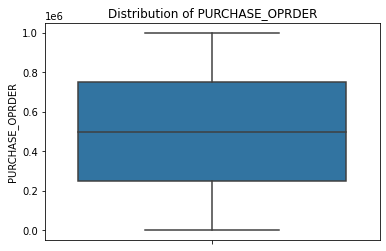

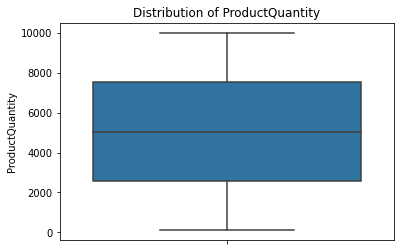

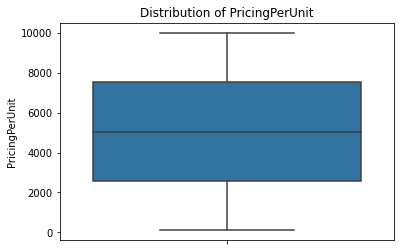

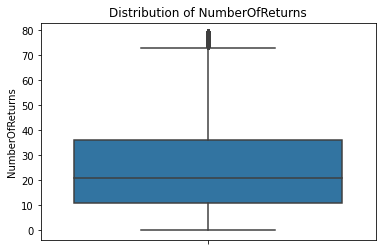

In [11]:
numeric_cols = appended_data.select_dtypes('int64')
for col in numeric_cols:
    plot_box(appended_data, col)

We can see the distrubution is very uniform and there are no inherent patterns

In [12]:
appended_data.drop('PURCHASE_OPRDER',axis=1, inplace=True)

In [13]:
y_columns = ['OverallRating']

In [14]:
y = appended_data.loc[:, y_columns]
y.head()

,OverallRating
0,3
1,2
2,3
3,2
4,1


In [15]:
X = appended_data.loc[:, [X for X in appended_data.columns if X not in y_columns]]
X.head()

,DateOfPurchase,ProductId,BuyerId,SupplierId,ProductQuantity,PricingPerUnit,NumberOfReturns,TimelyDeliveries,ProductQuality,ValueForMoney
0,2019-11-30T16:00:00.000Z,166,17,85,3285,1457,21,4,4,1
1,2019-10-26T00:00:00.000Z,172,87,51,3091,8595,17,1,4,3
2,2019-11-05T22:00:00.000Z,112,55,92,9991,3938,73,4,4,3
3,2020-07-20T04:00:00.000Z,25,29,14,2650,5029,19,4,1,2
4,2020-08-12T20:00:00.000Z,67,13,7,5249,9897,10,4,1,1


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   DateOfPurchase    999999 non-null  object  
 1   ProductId         999999 non-null  category
 2   BuyerId           999999 non-null  category
 3   SupplierId        999999 non-null  category
 4   ProductQuantity   999999 non-null  int64   
 5   PricingPerUnit    999999 non-null  int64   
 6   NumberOfReturns   999999 non-null  int64   
 7   TimelyDeliveries  999999 non-null  category
 8   ProductQuality    999999 non-null  category
 9   ValueForMoney     999999 non-null  category
dtypes: category(6), int64(3), object(1)
memory usage: 37.2+ MB


In [17]:
X['PercReturns'] = X['NumberOfReturns']/X['ProductQuantity']
X.drop(['NumberOfReturns', 'ProductQuantity'], axis=1, inplace=True)

In [18]:
X_categorical = X.select_dtypes(include=['category'])
X_categorical.columns
X_dummies = pd.get_dummies(X_categorical, drop_first=True)
X_dummies.head()

,ProductId_2,ProductId_3,ProductId_4,ProductId_5,ProductId_6,ProductId_7,ProductId_8,ProductId_9,ProductId_10,ProductId_11,ProductId_12,ProductId_13,ProductId_14,ProductId_15,ProductId_16,ProductId_17,ProductId_18,ProductId_19,ProductId_20,ProductId_21,ProductId_22,ProductId_23,ProductId_24,ProductId_25,ProductId_26,ProductId_27,ProductId_28,ProductId_29,ProductId_30,ProductId_31,ProductId_32,ProductId_33,ProductId_34,ProductId_35,ProductId_36,ProductId_37,ProductId_38,ProductId_39,ProductId_40,ProductId_41,ProductId_42,ProductId_43,ProductId_44,ProductId_45,ProductId_46,ProductId_47,ProductId_48,ProductId_49,ProductId_50,ProductId_51,ProductId_52,ProductId_53,ProductId_54,ProductId_55,ProductId_56,ProductId_57,ProductId_58,ProductId_59,ProductId_60,ProductId_61,ProductId_62,ProductId_63,ProductId_64,ProductId_65,ProductId_66,ProductId_67,ProductId_68,ProductId_69,ProductId_70,ProductId_71,ProductId_72,ProductId_73,ProductId_74,ProductId_75,ProductId_76,ProductId_77,ProductId_78,ProductId_79,ProductId_80,ProductId_81,ProductId_82,ProductId_83,ProductId_84,ProductId_85,ProductId_86,ProductId_87,ProductId_88,ProductId_89,ProductId_90,ProductId_91,ProductId_92,ProductId_93,ProductId_94,ProductId_95,ProductId_96,ProductId_97,ProductId_98,ProductId_99,ProductId_100,ProductId_101,ProductId_102,ProductId_103,ProductId_104,ProductId_105,ProductId_106,ProductId_107,ProductId_108,ProductId_109,ProductId_110,ProductId_111,ProductId_112,ProductId_113,ProductId_114,ProductId_115,ProductId_116,ProductId_117,ProductId_118,ProductId_119,ProductId_120,ProductId_121,ProductId_122,ProductId_123,ProductId_124,ProductId_125,ProductId_126,ProductId_127,ProductId_128,ProductId_129,ProductId_130,ProductId_131,ProductId_132,ProductId_133,ProductId_134,ProductId_135,ProductId_136,ProductId_137,ProductId_138,ProductId_139,ProductId_140,ProductId_141,ProductId_142,ProductId_143,ProductId_144,ProductId_145,ProductId_146,ProductId_147,ProductId_148,ProductId_149,ProductId_150,ProductId_151,ProductId_152,ProductId_153,ProductId_154,ProductId_155,ProductId_156,ProductId_157,ProductId_158,ProductId_159,ProductId_160,ProductId_161,ProductId_162,ProductId_163,ProductId_164,ProductId_165,ProductId_166,ProductId_167,ProductId_168,ProductId_169,ProductId_170,ProductId_171,ProductId_172,ProductId_173,ProductId_174,ProductId_175,ProductId_176,ProductId_177,ProductId_178,ProductId_179,ProductId_180,ProductId_181,ProductId_182,ProductId_183,ProductId_184,ProductId_185,ProductId_186,ProductId_187,ProductId_188,ProductId_189,ProductId_190,ProductId_191,ProductId_192,ProductId_193,ProductId_194,ProductId_195,ProductId_196,ProductId_197,ProductId_198,ProductId_199,ProductId_200,BuyerId_2,BuyerId_3,BuyerId_4,BuyerId_5,BuyerId_6,BuyerId_7,BuyerId_8,BuyerId_9,BuyerId_10,BuyerId_11,BuyerId_12,BuyerId_13,BuyerId_14,BuyerId_15,BuyerId_16,BuyerId_17,BuyerId_18,BuyerId_19,BuyerId_20,BuyerId_21,BuyerId_22,BuyerId_23,BuyerId_24,BuyerId_25,BuyerId_26,BuyerId_27,BuyerId_28,BuyerId_29,BuyerId_30,BuyerId_31,BuyerId_32,BuyerId_33,BuyerId_34,BuyerId_35,BuyerId_36,BuyerId_37,BuyerId_38,BuyerId_39,BuyerId_40,BuyerId_41,BuyerId_42,BuyerId_43,BuyerId_44,BuyerId_45,BuyerId_46,BuyerId_47,BuyerId_48,BuyerId_49,BuyerId_50,BuyerId_51,BuyerId_52,BuyerId_53,BuyerId_54,BuyerId_55,BuyerId_56,BuyerId_57,BuyerId_58,BuyerId_59,BuyerId_60,BuyerId_61,BuyerId_62,BuyerId_63,BuyerId_64,BuyerId_65,BuyerId_66,BuyerId_67,BuyerId_68,BuyerId_69,BuyerId_70,BuyerId_71,BuyerId_72,BuyerId_73,BuyerId_74,BuyerId_75,BuyerId_76,BuyerId_77,BuyerId_78,BuyerId_79,BuyerId_80,BuyerId_81,BuyerId_82,BuyerId_83,BuyerId_84,BuyerId_85,BuyerId_86,BuyerId_87,BuyerId_88,BuyerId_89,BuyerId_90,BuyerId_91,BuyerId_92,BuyerId_93,BuyerId_94,BuyerId_95,BuyerId_96,BuyerId_97,BuyerId_98,BuyerId_99,BuyerId_100,SupplierId_2,SupplierId_3,SupplierId_4,SupplierId_5,SupplierId_6,SupplierId_7,SupplierId_8,SupplierId_9,SupplierId_10,SupplierId_11,SupplierId_12,SupplierId_13,SupplierId_14,SupplierId_15,SupplierId_16,SupplierId_17,SupplierId_18,Supplie

In [19]:
X.drop(X_categorical.columns, axis=1, inplace=True)
X = pd.concat([X, X_dummies], axis=1)

In [20]:
X.drop('DateOfPurchase', axis=1, inplace=True)

In [21]:
X.head()

,PricingPerUnit,PercReturns,ProductId_2,ProductId_3,ProductId_4,ProductId_5,ProductId_6,ProductId_7,ProductId_8,ProductId_9,ProductId_10,ProductId_11,ProductId_12,ProductId_13,ProductId_14,ProductId_15,ProductId_16,ProductId_17,ProductId_18,ProductId_19,ProductId_20,ProductId_21,ProductId_22,ProductId_23,ProductId_24,ProductId_25,ProductId_26,ProductId_27,ProductId_28,ProductId_29,ProductId_30,ProductId_31,ProductId_32,ProductId_33,ProductId_34,ProductId_35,ProductId_36,ProductId_37,ProductId_38,ProductId_39,ProductId_40,ProductId_41,ProductId_42,ProductId_43,ProductId_44,ProductId_45,ProductId_46,ProductId_47,ProductId_48,ProductId_49,ProductId_50,ProductId_51,ProductId_52,ProductId_53,ProductId_54,ProductId_55,ProductId_56,ProductId_57,ProductId_58,ProductId_59,ProductId_60,ProductId_61,ProductId_62,ProductId_63,ProductId_64,ProductId_65,ProductId_66,ProductId_67,ProductId_68,ProductId_69,ProductId_70,ProductId_71,ProductId_72,ProductId_73,ProductId_74,ProductId_75,ProductId_76,ProductId_77,ProductId_78,ProductId_79,ProductId_80,ProductId_81,ProductId_82,ProductId_83,ProductId_84,ProductId_85,ProductId_86,ProductId_87,ProductId_88,ProductId_89,ProductId_90,ProductId_91,ProductId_92,ProductId_93,ProductId_94,ProductId_95,ProductId_96,ProductId_97,ProductId_98,ProductId_99,ProductId_100,ProductId_101,ProductId_102,ProductId_103,ProductId_104,ProductId_105,ProductId_106,ProductId_107,ProductId_108,ProductId_109,ProductId_110,ProductId_111,ProductId_112,ProductId_113,ProductId_114,ProductId_115,ProductId_116,ProductId_117,ProductId_118,ProductId_119,ProductId_120,ProductId_121,ProductId_122,ProductId_123,ProductId_124,ProductId_125,ProductId_126,ProductId_127,ProductId_128,ProductId_129,ProductId_130,ProductId_131,ProductId_132,ProductId_133,ProductId_134,ProductId_135,ProductId_136,ProductId_137,ProductId_138,ProductId_139,ProductId_140,ProductId_141,ProductId_142,ProductId_143,ProductId_144,ProductId_145,ProductId_146,ProductId_147,ProductId_148,ProductId_149,ProductId_150,ProductId_151,ProductId_152,ProductId_153,ProductId_154,ProductId_155,ProductId_156,ProductId_157,ProductId_158,ProductId_159,ProductId_160,ProductId_161,ProductId_162,ProductId_163,ProductId_164,ProductId_165,ProductId_166,ProductId_167,ProductId_168,ProductId_169,ProductId_170,ProductId_171,ProductId_172,ProductId_173,ProductId_174,ProductId_175,ProductId_176,ProductId_177,ProductId_178,ProductId_179,ProductId_180,ProductId_181,ProductId_182,ProductId_183,ProductId_184,ProductId_185,ProductId_186,ProductId_187,ProductId_188,ProductId_189,ProductId_190,ProductId_191,ProductId_192,ProductId_193,ProductId_194,ProductId_195,ProductId_196,ProductId_197,ProductId_198,ProductId_199,ProductId_200,BuyerId_2,BuyerId_3,BuyerId_4,BuyerId_5,BuyerId_6,BuyerId_7,BuyerId_8,BuyerId_9,BuyerId_10,BuyerId_11,BuyerId_12,BuyerId_13,BuyerId_14,BuyerId_15,BuyerId_16,BuyerId_17,BuyerId_18,BuyerId_19,BuyerId_20,BuyerId_21,BuyerId_22,BuyerId_23,BuyerId_24,BuyerId_25,BuyerId_26,BuyerId_27,BuyerId_28,BuyerId_29,BuyerId_30,BuyerId_31,BuyerId_32,BuyerId_33,BuyerId_34,BuyerId_35,BuyerId_36,BuyerId_37,BuyerId_38,BuyerId_39,BuyerId_40,BuyerId_41,BuyerId_42,BuyerId_43,BuyerId_44,BuyerId_45,BuyerId_46,BuyerId_47,BuyerId_48,BuyerId_49,BuyerId_50,BuyerId_51,BuyerId_52,BuyerId_53,BuyerId_54,BuyerId_55,BuyerId_56,BuyerId_57,BuyerId_58,BuyerId_59,BuyerId_60,BuyerId_61,BuyerId_62,BuyerId_63,BuyerId_64,BuyerId_65,BuyerId_66,BuyerId_67,BuyerId_68,BuyerId_69,BuyerId_70,BuyerId_71,BuyerId_72,BuyerId_73,BuyerId_74,BuyerId_75,BuyerId_76,BuyerId_77,BuyerId_78,BuyerId_79,BuyerId_80,BuyerId_81,BuyerId_82,BuyerId_83,BuyerId_84,BuyerId_85,BuyerId_86,BuyerId_87,BuyerId_88,BuyerId_89,BuyerId_90,BuyerId_91,BuyerId_92,BuyerId_93,BuyerId_94,BuyerId_95,BuyerId_96,BuyerId_97,BuyerId_98,BuyerId_99,BuyerId_100,SupplierId_2,SupplierId_3,SupplierId_4,SupplierId_5,SupplierId_6,SupplierId_7,SupplierId_8,SupplierId_9,SupplierId_10,SupplierId_11,SupplierId_12,SupplierId_13,SupplierId_14,SupplierId_15,SupplierId_16,Supplier

In [22]:
#Splitting into train set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(799999, 411)
(200000, 411)
(799999, 1)
(200000, 1)


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_numerical = X.select_dtypes(include=['int64'])
X_numerical_columns = X_numerical.columns
X_train.loc[:, X_numerical_columns] = scaler.fit_transform(X_train.loc[:, X_numerical_columns])
X_train.head()

c:\users\anish.alapattu\pycharmprojects\supplierevaluation\venv\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,PricingPerUnit,PercReturns,ProductId_2,ProductId_3,ProductId_4,ProductId_5,ProductId_6,ProductId_7,ProductId_8,ProductId_9,ProductId_10,ProductId_11,ProductId_12,ProductId_13,ProductId_14,ProductId_15,ProductId_16,ProductId_17,ProductId_18,ProductId_19,ProductId_20,ProductId_21,ProductId_22,ProductId_23,ProductId_24,ProductId_25,ProductId_26,ProductId_27,ProductId_28,ProductId_29,ProductId_30,ProductId_31,ProductId_32,ProductId_33,ProductId_34,ProductId_35,ProductId_36,ProductId_37,ProductId_38,ProductId_39,ProductId_40,ProductId_41,ProductId_42,ProductId_43,ProductId_44,ProductId_45,ProductId_46,ProductId_47,ProductId_48,ProductId_49,ProductId_50,ProductId_51,ProductId_52,ProductId_53,ProductId_54,ProductId_55,ProductId_56,ProductId_57,ProductId_58,ProductId_59,ProductId_60,ProductId_61,ProductId_62,ProductId_63,ProductId_64,ProductId_65,ProductId_66,ProductId_67,ProductId_68,ProductId_69,ProductId_70,ProductId_71,ProductId_72,ProductId_73,ProductId_74,ProductId_75,ProductId_76,ProductId_77,ProductId_78,ProductId_79,ProductId_80,ProductId_81,ProductId_82,ProductId_83,ProductId_84,ProductId_85,ProductId_86,ProductId_87,ProductId_88,ProductId_89,ProductId_90,ProductId_91,ProductId_92,ProductId_93,ProductId_94,ProductId_95,ProductId_96,ProductId_97,ProductId_98,ProductId_99,ProductId_100,ProductId_101,ProductId_102,ProductId_103,ProductId_104,ProductId_105,ProductId_106,ProductId_107,ProductId_108,ProductId_109,ProductId_110,ProductId_111,ProductId_112,ProductId_113,ProductId_114,ProductId_115,ProductId_116,ProductId_117,ProductId_118,ProductId_119,ProductId_120,ProductId_121,ProductId_122,ProductId_123,ProductId_124,ProductId_125,ProductId_126,ProductId_127,ProductId_128,ProductId_129,ProductId_130,ProductId_131,ProductId_132,ProductId_133,ProductId_134,ProductId_135,ProductId_136,ProductId_137,ProductId_138,ProductId_139,ProductId_140,ProductId_141,ProductId_142,ProductId_143,ProductId_144,ProductId_145,ProductId_146,ProductId_147,ProductId_148,ProductId_149,ProductId_150,ProductId_151,ProductId_152,ProductId_153,ProductId_154,ProductId_155,ProductId_156,ProductId_157,ProductId_158,ProductId_159,ProductId_160,ProductId_161,ProductId_162,ProductId_163,ProductId_164,ProductId_165,ProductId_166,ProductId_167,ProductId_168,ProductId_169,ProductId_170,ProductId_171,ProductId_172,ProductId_173,ProductId_174,ProductId_175,ProductId_176,ProductId_177,ProductId_178,ProductId_179,ProductId_180,ProductId_181,ProductId_182,ProductId_183,ProductId_184,ProductId_185,ProductId_186,ProductId_187,ProductId_188,ProductId_189,ProductId_190,ProductId_191,ProductId_192,ProductId_193,ProductId_194,ProductId_195,ProductId_196,ProductId_197,ProductId_198,ProductId_199,ProductId_200,BuyerId_2,BuyerId_3,BuyerId_4,BuyerId_5,BuyerId_6,BuyerId_7,BuyerId_8,BuyerId_9,BuyerId_10,BuyerId_11,BuyerId_12,BuyerId_13,BuyerId_14,BuyerId_15,BuyerId_16,BuyerId_17,BuyerId_18,BuyerId_19,BuyerId_20,BuyerId_21,BuyerId_22,BuyerId_23,BuyerId_24,BuyerId_25,BuyerId_26,BuyerId_27,BuyerId_28,BuyerId_29,BuyerId_30,BuyerId_31,BuyerId_32,BuyerId_33,BuyerId_34,BuyerId_35,BuyerId_36,BuyerId_37,BuyerId_38,BuyerId_39,BuyerId_40,BuyerId_41,BuyerId_42,BuyerId_43,BuyerId_44,BuyerId_45,BuyerId_46,BuyerId_47,BuyerId_48,BuyerId_49,BuyerId_50,BuyerId_51,BuyerId_52,BuyerId_53,BuyerId_54,BuyerId_55,BuyerId_56,BuyerId_57,BuyerId_58,BuyerId_59,BuyerId_60,BuyerId_61,BuyerId_62,BuyerId_63,BuyerId_64,BuyerId_65,BuyerId_66,BuyerId_67,BuyerId_68,BuyerId_69,BuyerId_70,BuyerId_71,BuyerId_72,BuyerId_73,BuyerId_74,BuyerId_75,BuyerId_76,BuyerId_77,BuyerId_78,BuyerId_79,BuyerId_80,BuyerId_81,BuyerId_82,BuyerId_83,BuyerId_84,BuyerId_85,BuyerId_86,BuyerId_87,BuyerId_88,BuyerId_89,BuyerId_90,BuyerId_91,BuyerId_92,BuyerId_93,BuyerId_94,BuyerId_95,BuyerId_96,BuyerId_97,BuyerId_98,BuyerId_99,BuyerId_100,SupplierId_2,SupplierId_3,SupplierId_4,SupplierId_5,SupplierId_6,SupplierId_7,SupplierId_8,SupplierId_9,SupplierId_10,SupplierId_11,SupplierId_12,SupplierId_13,SupplierId_14,SupplierId_15,SupplierId_16,Supplier

In [24]:
#transforming test set using the same scaler object so that there is no leakage of data from train to test
X_test.loc[:, X_numerical_columns] = scaler.transform(X_test.loc[:, X_numerical_columns])
X_test.head()

c:\users\anish.alapattu\pycharmprojects\supplierevaluation\venv\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,PricingPerUnit,PercReturns,ProductId_2,ProductId_3,ProductId_4,ProductId_5,ProductId_6,ProductId_7,ProductId_8,ProductId_9,ProductId_10,ProductId_11,ProductId_12,ProductId_13,ProductId_14,ProductId_15,ProductId_16,ProductId_17,ProductId_18,ProductId_19,ProductId_20,ProductId_21,ProductId_22,ProductId_23,ProductId_24,ProductId_25,ProductId_26,ProductId_27,ProductId_28,ProductId_29,ProductId_30,ProductId_31,ProductId_32,ProductId_33,ProductId_34,ProductId_35,ProductId_36,ProductId_37,ProductId_38,ProductId_39,ProductId_40,ProductId_41,ProductId_42,ProductId_43,ProductId_44,ProductId_45,ProductId_46,ProductId_47,ProductId_48,ProductId_49,ProductId_50,ProductId_51,ProductId_52,ProductId_53,ProductId_54,ProductId_55,ProductId_56,ProductId_57,ProductId_58,ProductId_59,ProductId_60,ProductId_61,ProductId_62,ProductId_63,ProductId_64,ProductId_65,ProductId_66,ProductId_67,ProductId_68,ProductId_69,ProductId_70,ProductId_71,ProductId_72,ProductId_73,ProductId_74,ProductId_75,ProductId_76,ProductId_77,ProductId_78,ProductId_79,ProductId_80,ProductId_81,ProductId_82,ProductId_83,ProductId_84,ProductId_85,ProductId_86,ProductId_87,ProductId_88,ProductId_89,ProductId_90,ProductId_91,ProductId_92,ProductId_93,ProductId_94,ProductId_95,ProductId_96,ProductId_97,ProductId_98,ProductId_99,ProductId_100,ProductId_101,ProductId_102,ProductId_103,ProductId_104,ProductId_105,ProductId_106,ProductId_107,ProductId_108,ProductId_109,ProductId_110,ProductId_111,ProductId_112,ProductId_113,ProductId_114,ProductId_115,ProductId_116,ProductId_117,ProductId_118,ProductId_119,ProductId_120,ProductId_121,ProductId_122,ProductId_123,ProductId_124,ProductId_125,ProductId_126,ProductId_127,ProductId_128,ProductId_129,ProductId_130,ProductId_131,ProductId_132,ProductId_133,ProductId_134,ProductId_135,ProductId_136,ProductId_137,ProductId_138,ProductId_139,ProductId_140,ProductId_141,ProductId_142,ProductId_143,ProductId_144,ProductId_145,ProductId_146,ProductId_147,ProductId_148,ProductId_149,ProductId_150,ProductId_151,ProductId_152,ProductId_153,ProductId_154,ProductId_155,ProductId_156,ProductId_157,ProductId_158,ProductId_159,ProductId_160,ProductId_161,ProductId_162,ProductId_163,ProductId_164,ProductId_165,ProductId_166,ProductId_167,ProductId_168,ProductId_169,ProductId_170,ProductId_171,ProductId_172,ProductId_173,ProductId_174,ProductId_175,ProductId_176,ProductId_177,ProductId_178,ProductId_179,ProductId_180,ProductId_181,ProductId_182,ProductId_183,ProductId_184,ProductId_185,ProductId_186,ProductId_187,ProductId_188,ProductId_189,ProductId_190,ProductId_191,ProductId_192,ProductId_193,ProductId_194,ProductId_195,ProductId_196,ProductId_197,ProductId_198,ProductId_199,ProductId_200,BuyerId_2,BuyerId_3,BuyerId_4,BuyerId_5,BuyerId_6,BuyerId_7,BuyerId_8,BuyerId_9,BuyerId_10,BuyerId_11,BuyerId_12,BuyerId_13,BuyerId_14,BuyerId_15,BuyerId_16,BuyerId_17,BuyerId_18,BuyerId_19,BuyerId_20,BuyerId_21,BuyerId_22,BuyerId_23,BuyerId_24,BuyerId_25,BuyerId_26,BuyerId_27,BuyerId_28,BuyerId_29,BuyerId_30,BuyerId_31,BuyerId_32,BuyerId_33,BuyerId_34,BuyerId_35,BuyerId_36,BuyerId_37,BuyerId_38,BuyerId_39,BuyerId_40,BuyerId_41,BuyerId_42,BuyerId_43,BuyerId_44,BuyerId_45,BuyerId_46,BuyerId_47,BuyerId_48,BuyerId_49,BuyerId_50,BuyerId_51,BuyerId_52,BuyerId_53,BuyerId_54,BuyerId_55,BuyerId_56,BuyerId_57,BuyerId_58,BuyerId_59,BuyerId_60,BuyerId_61,BuyerId_62,BuyerId_63,BuyerId_64,BuyerId_65,BuyerId_66,BuyerId_67,BuyerId_68,BuyerId_69,BuyerId_70,BuyerId_71,BuyerId_72,BuyerId_73,BuyerId_74,BuyerId_75,BuyerId_76,BuyerId_77,BuyerId_78,BuyerId_79,BuyerId_80,BuyerId_81,BuyerId_82,BuyerId_83,BuyerId_84,BuyerId_85,BuyerId_86,BuyerId_87,BuyerId_88,BuyerId_89,BuyerId_90,BuyerId_91,BuyerId_92,BuyerId_93,BuyerId_94,BuyerId_95,BuyerId_96,BuyerId_97,BuyerId_98,BuyerId_99,BuyerId_100,SupplierId_2,SupplierId_3,SupplierId_4,SupplierId_5,SupplierId_6,SupplierId_7,SupplierId_8,SupplierId_9,SupplierId_10,SupplierId_11,SupplierId_12,SupplierId_13,SupplierId_14,SupplierId_15,SupplierId_16,Supplier

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
"""We are treating the problem as a muticlass classification,
building a random forest classifier and predicting the overall rating"""
rf = RandomForestClassifier(random_state=100, 
        n_estimators=100, 
        max_depth=10, 
        max_features=50, 
        min_samples_leaf=1000,
        min_samples_split = 1000, warm_start=True, oob_score=True)

In [27]:
rf.fit(X_train, y_train)

c:\users\anish.alapattu\pycharmprojects\supplierevaluation\venv\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(max_depth=10, max_features=50, min_samples_leaf=1000,
                       min_samples_split=1000, oob_score=True, random_state=100,
                       warm_start=True)

In [28]:
y_train_pred = rf.predict(X_train)

In [29]:
y_train_pred[:5]

array([3, 2, 3, 3, 3], dtype=int64)

In [30]:
y_train[:5]

,OverallRating
682630,3
403543,2
694555,4
52901,3
956262,2


In [31]:
from sklearn.metrics import r2_score
print(r2_score(y_train, y_train_pred))

0.5153429997749739


In [32]:
y_test_pred = rf.predict(X_test)

In [33]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_test_pred))

0.5171669303660179


In [34]:
rf.oob_score_

0.6422858028572536

In [35]:
filename = 'finalized_model.sav'

In [36]:
import pickle
pickle.dump(rf, open(filename, 'wb'))